In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
auto=pd.read_csv('../../data/Auto.csv')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [19]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [24]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [21]:
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [22]:
auto=auto[auto['horsepower']!='?']

In [23]:
auto['horsepower']=pd.to_numeric(auto['horsepower'])

### 
a) Quantitative and qualitative predictors

In [28]:
quantitative=auto.select_dtypes(include='number').columns
quantitative

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [29]:
qualitative=auto.select_dtypes(exclude='number').columns
qualitative

Index(['name'], dtype='object')

In [36]:
auto_quantitative=auto[quantitative].describe()
auto_quantitative

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [38]:
auto_quantitative.loc['range']=auto_quantitative.loc['max']-auto_quantitative.loc['min']
auto_quantitative.loc['range']

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
range              NaN
Name: range, dtype: float64

In [41]:
#auto_quantitative.drop(['range'],axis=1)

In [42]:
# Mean of Quantitative
auto_quantitative.loc['mean']

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
origin             1.576531
range                   NaN
Name: mean, dtype: float64

In [43]:
# Std of Quantitative
auto_quantitative.loc['std']

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
origin            0.805518
range                  NaN
Name: std, dtype: float64

In [64]:
# 9(d)
s_desc=['range','std','mean']
auto_9_d=auto.drop(auto.index[10:85]).describe()
auto_9_d.loc['range']=auto_9_d.loc['max']-auto_9_d.loc['min']

In [65]:
auto_9_d.loc[s_desc]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
range,35.600000,5.000000,387.000000,184.000000,3348.000000,16.300000,12.000000,2.000000
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369


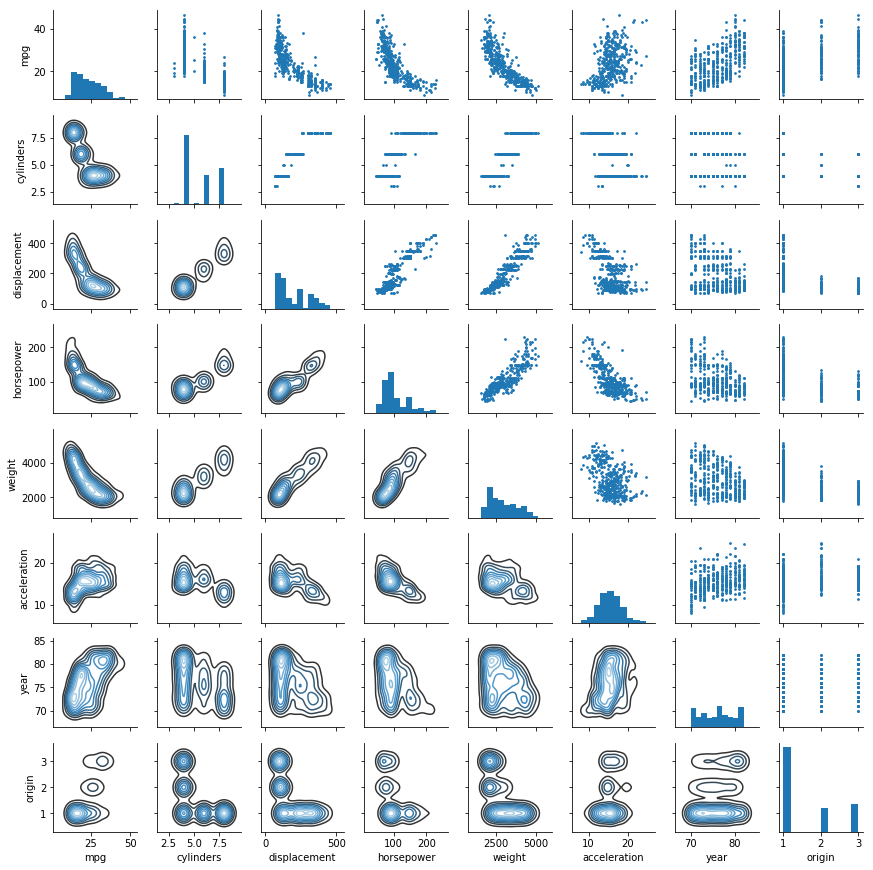

In [67]:
g = sns.PairGrid(auto, height=2)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(12, 12)
